# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = "imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="
cityname = []
country = []
date = []
latitude = []
longitude = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
counter = 1 

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query + city).json()
        cityname.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {counter} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        counter += 1
        
    except:
        print("City not found. Skipping...") 
    continue
    
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Puerto Limón
Processing Record 2 | Castro
Processing Record 3 | Nabire
Processing Record 4 | Ushuaia
Processing Record 5 | Mehamn
City not found. Skipping...
Processing Record 6 | Hermanus
Processing Record 7 | Karpogory
Processing Record 8 | Cooma
Processing Record 9 | Rikitea
Processing Record 10 | Jamestown
Processing Record 11 | Habiganj
Processing Record 12 | Amarante do Maranhão
Processing Record 13 | Busselton
Processing Record 14 | Sitka
Processing Record 15 | Guaitarilla
Processing Record 16 | Jackson
Processing Record 17 | Vaini
City not found. Skipping...
Processing Record 18 | Bilibino
Processing Record 19 | Bethel
Processing Record 20 | Lleida
Processing Record 21 | Mataura
Processing Record 22 | Buin
Processing Record 23 | Avarua
Processing Record 24 | Belyy Yar
Processing Record 25 | Tomohon
Processing Record 26 | Atuona
Processing Record 27 | San Andrés
Processing Record 28 | Hilo
Processing 

Processing Record 227 | Simpang
City not found. Skipping...
Processing Record 228 | Waipawa
Processing Record 229 | Olafsvik
Processing Record 230 | Davila
Processing Record 231 | Westport
Processing Record 232 | Ramsar
Processing Record 233 | Sehithwa
City not found. Skipping...
Processing Record 234 | Oranjestad
Processing Record 235 | Mayumba
Processing Record 236 | Pemangkat
Processing Record 237 | Kiryat Gat
Processing Record 238 | Laas
Processing Record 239 | Pitsunda
Processing Record 240 | Monze
City not found. Skipping...
Processing Record 241 | Puerto Baquerizo Moreno
Processing Record 242 | Mahébourg
Processing Record 243 | Novoagansk
Processing Record 244 | Antofagasta
Processing Record 245 | Carutapera
Processing Record 246 | Husavik
Processing Record 247 | Srednekolymsk
Processing Record 248 | Słupsk
Processing Record 249 | Bose
Processing Record 250 | Airai
City not found. Skipping...
Processing Record 251 | Palmer
Processing Record 252 | Santa Maria
Processing Record 25

Processing Record 454 | Linxia Chengguanzhen
Processing Record 455 | Kirkwall
Processing Record 456 | Marzuq
Processing Record 457 | Port-Gentil
Processing Record 458 | Rājākhera
Processing Record 459 | Tairua
Processing Record 460 | Inuvik
Processing Record 461 | Botwood
Processing Record 462 | Mizdah
Processing Record 463 | Ouadda
Processing Record 464 | Poya
Processing Record 465 | Abay
Processing Record 466 | Oruzgan
Processing Record 467 | Tarakan
Processing Record 468 | Paptalaya
Processing Record 469 | Callaguip
Processing Record 470 | Lavrentiya
Processing Record 471 | Colmenar Viejo
Processing Record 472 | Ola
Processing Record 473 | Havøysund
Processing Record 474 | Erzin
City not found. Skipping...
Processing Record 475 | Conceição do Araguaia
City not found. Skipping...
Processing Record 476 | Chimoio
Processing Record 477 | Porosozero
Processing Record 478 | Tigil'
Processing Record 479 | Muros
Processing Record 480 | Lázaro Cárdenas
Processing Record 481 | Elizabeth City


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather = {"City Name":cityname, "Country":country,"Latitude":latitude,"Longitude":longitude,
           "Max Temperature":maxtemp,"Humidity":humidity,"Cloudiness":cloudiness,
           "Wind Speed":windspeed,"Date":date}
df = pd.DataFrame (weather)
df.to_csv("./outputdata/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.

df["Humidity"].max()
#shows that there are no cities with has humidity over 100% 

100

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [7]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

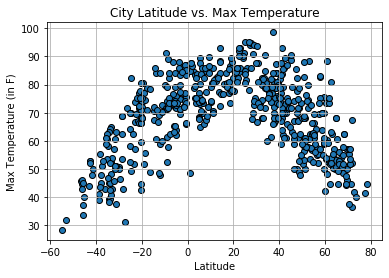

In [8]:
x = df['Latitude']
y = df['Max Temperature']
plt.scatter(x, y, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (in F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.savefig('./outputdata/CityLatitudeVsMaxTemp.png')

## Latitude vs. Humidity Plot

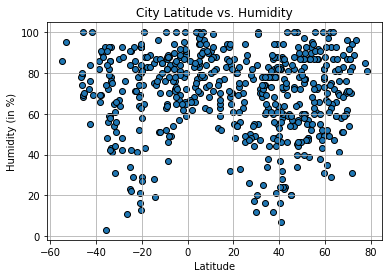

In [9]:
x = df['Latitude']
y = df['Humidity']
plt.scatter(x, y, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (in %)')
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.savefig('./outputdata/CityLatitudeVsHumidity.png')

## Latitude vs. Cloudiness Plot

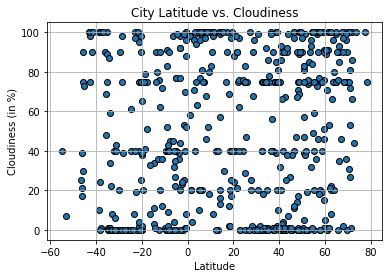

In [10]:
x = df['Latitude']
y = df['Cloudiness']
plt.scatter(x, y, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (in %)')
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.savefig('./outputdata/CityLatitudeVsCloudiness.png')

## Latitude vs. Wind Speed Plot

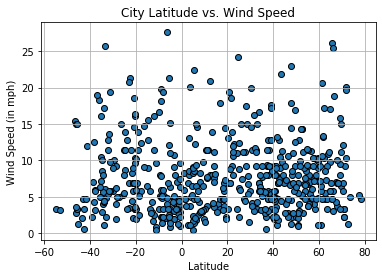

In [11]:
x = df['Latitude']
y = df['Wind Speed']
plt.scatter(x, y, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (in mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.savefig('./outputdata/CityLatitudeVsWindSpeed.png')

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x = df['Latitude']
    y = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    print(f"The r-squared is: {rvalue}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northernhemisphere= df.loc[df['Latitude'] > 0, :]
southernhemisphere = df.loc[df['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6613525220803431


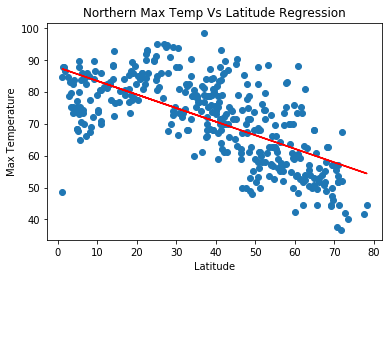

In [14]:
linear_reg_plot(northernhemisphere, 'Northern Max Temp Vs Latitude Regression', 'Max Temperature', 'Max Temperature', 
                './outputdata/NorthernMaxTempVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/NorthernMaxTempVsLatitudeReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7669270141740343


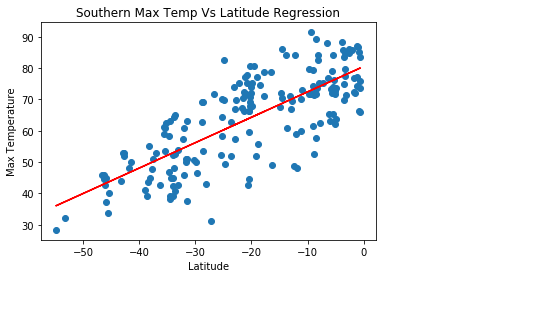

In [15]:
linear_reg_plot(southernhemisphere, 'Southern Max Temp Vs Latitude Regression', 'Max Temperature', 'Max Temperature', 
                './outputdata/SouthernMaxTempVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/SouthernMaxTempVsLatitudeReg.png")

In [16]:
#Data analysis: There is a clear correlation between the max temperature and how close you are to 0 latitude 
#in both northern and southern hemisphere, the closer to 0 latitude, the higher the max temperature this makes
#sense because the closer you are to the equator, the closer you are to the sun consistently 

In [17]:
####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.11700065928585503


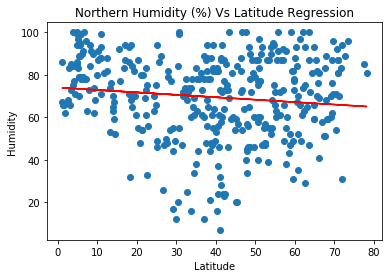

In [18]:
linear_reg_plot(northernhemisphere, 'Northern Humidity (%) Vs Latitude Regression', 'Humidity', 'Humidity', 
                './outputdata/NorthernHumidityVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/NorthernHumidityVsLatitudeReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08566892664172555


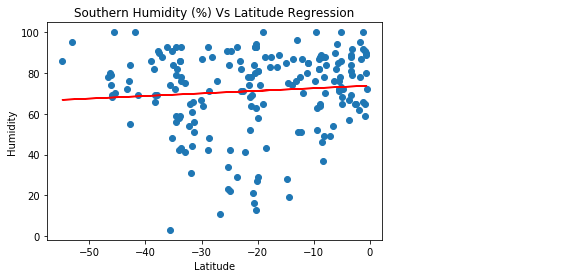

In [19]:
linear_reg_plot(southernhemisphere, 'Southern Humidity (%) Vs Latitude Regression', 'Humidity', 'Humidity', 
                './outputdata/SouthernHumidityVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/SouthernHumidityVsLatitudeReg.png")

In [20]:
#Data Analysis: There is no correlation between latitude and humidity in either northern or southern hemisphere
#This makes sense because humidity is dependent on amount of water and not on location on the planet 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.033240667433034526


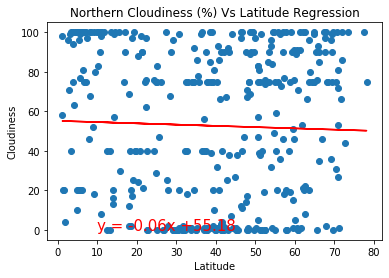

In [21]:
linear_reg_plot(northernhemisphere, 'Northern Cloudiness (%) Vs Latitude Regression', 'Cloudiness', 'Cloudiness', 
                './outputdata/NorthernCloudinessyVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/NorthernCloudinessyVsLatitudeReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0146552752146812


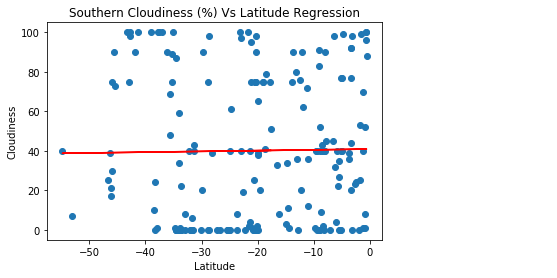

In [22]:
linear_reg_plot(southernhemisphere, 'Southern Cloudiness (%) Vs Latitude Regression', 'Cloudiness', 'Cloudiness', 
                './outputdata/SouthernCloudinessVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/SouthernCloudinessVsLatitudeReg.png")

In [23]:
#Data Analysis: There is no correlation between latitude and cloudiness in either northern or southern hemisphere
#You would expect to see more clouds the farther you get away from the sun or due to amount of land mass
#because there is a difference between water on earth and atmospheric water, but that is not the case. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07318192582338023


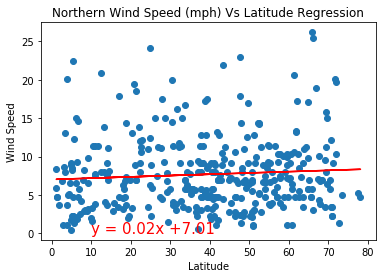

In [24]:
linear_reg_plot(northernhemisphere, 'Northern Wind Speed (mph) Vs Latitude Regression', 'Wind Speed', 'Wind Speed',
                './outputdata/NorthernWindVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/NorthernWindVsLatitudeReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0916362972972358


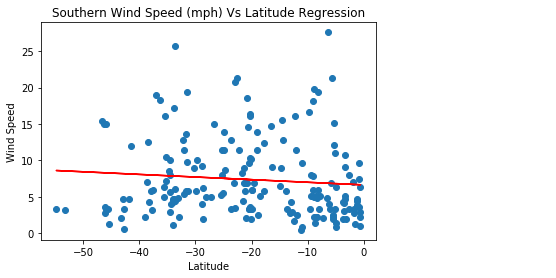

In [25]:
linear_reg_plot(southernhemisphere, 'Southern Wind Speed (mph) Vs Latitude Regression', 'Wind Speed', 'Wind Speed', 
                './outputdata/SouthernWindVsLatitudeReg.png', (10,0)) 
plt.savefig("./outputdata/SouthernWindVsLatitudeReg.png")

In [26]:
#Data Analysis: There is no correlation between latitude and wind speed in either northern or southern hemisphere